In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('../app/superstore.csv', encoding='latin1')


# Display top 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])



In [8]:
df.drop_duplicates(inplace=True)

print("Missing values:\n", df.isnull().sum())


df.dropna(inplace=True)


Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
# Profit Margin
df['Profit Margin'] = df['Profit'] / df['Sales']

# Month-Year column
df['Order Month'] = df['Order Date'].dt.to_period('M')


In [10]:
df.info()
df[['Sales', 'Profit', 'Profit Margin']].describe()
df[['Order Date', 'Ship Date', 'Order Month']].head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Order Date,Ship Date,Order Month
0,2016-11-08,2016-11-11,2016-11
1,2016-11-08,2016-11-11,2016-11
2,2016-06-12,2016-06-16,2016-06
3,2015-10-11,2015-10-18,2015-10
4,2015-10-11,2015-10-18,2015-10


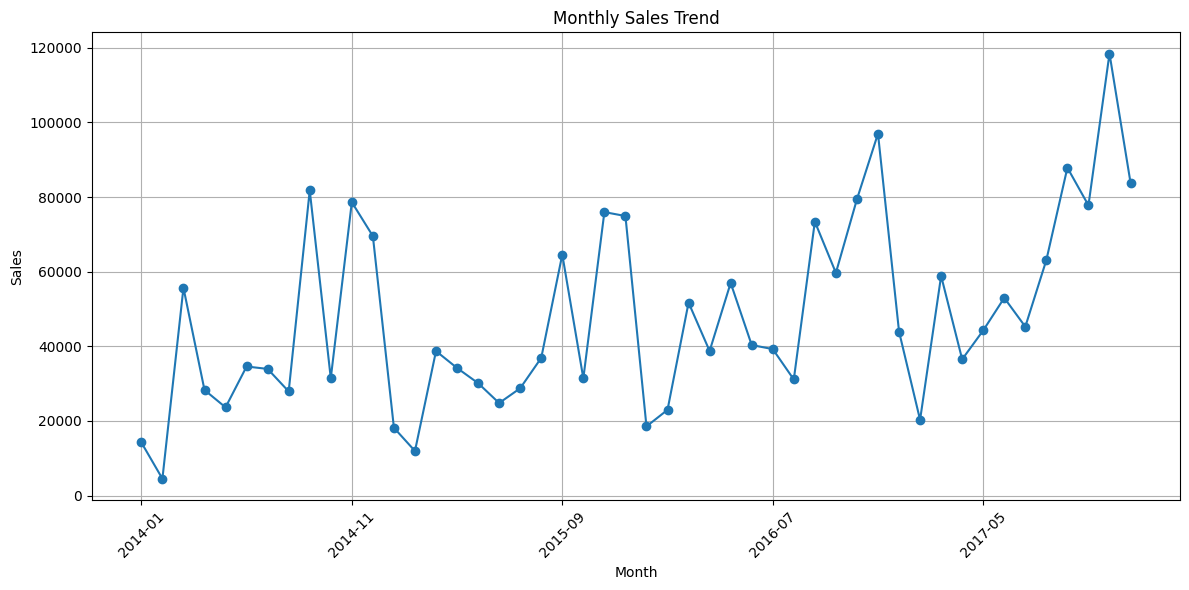

In [13]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


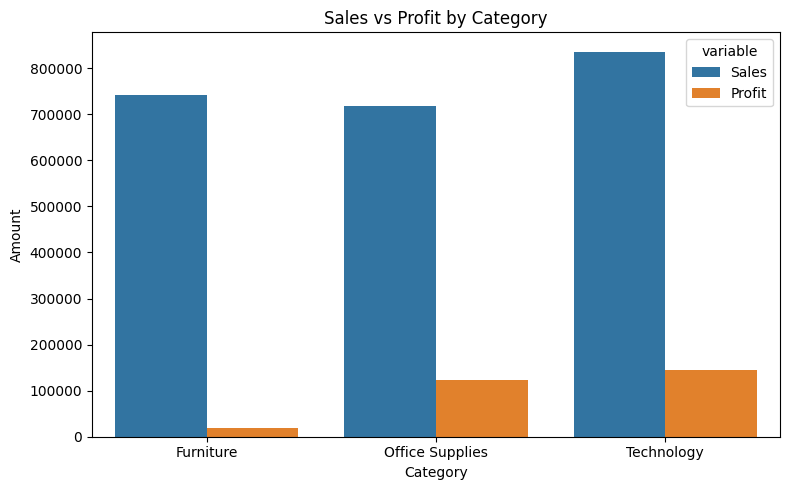

In [15]:
import seaborn as sns

category_perf = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=category_perf.melt(id_vars='Category'), x='Category', y='value', hue='variable')
plt.title('Sales vs Profit by Category')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


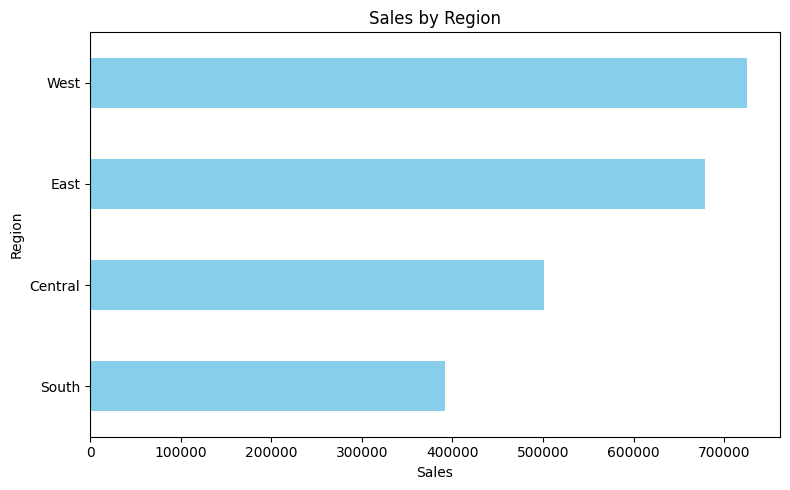

In [16]:


region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(8, 5))
region_sales.plot(kind='barh', color='skyblue')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()


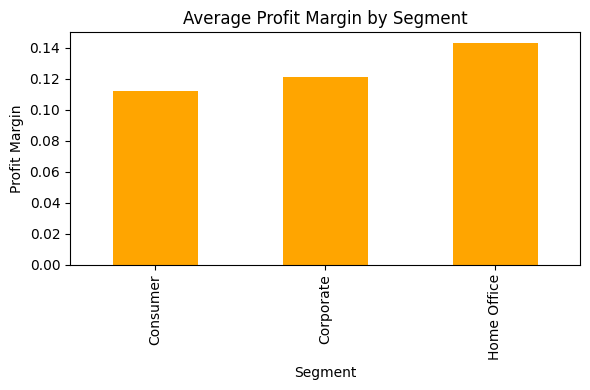

In [17]:
segment_margin = df.groupby('Segment')['Profit Margin'].mean()

plt.figure(figsize=(6, 4))
segment_margin.plot(kind='bar', color='orange')
plt.title('Average Profit Margin by Segment')
plt.ylabel('Profit Margin')
plt.tight_layout()
plt.show()


C:\Users\Aman\AppData\Local\Temp\ipykernel_20700\970340217.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


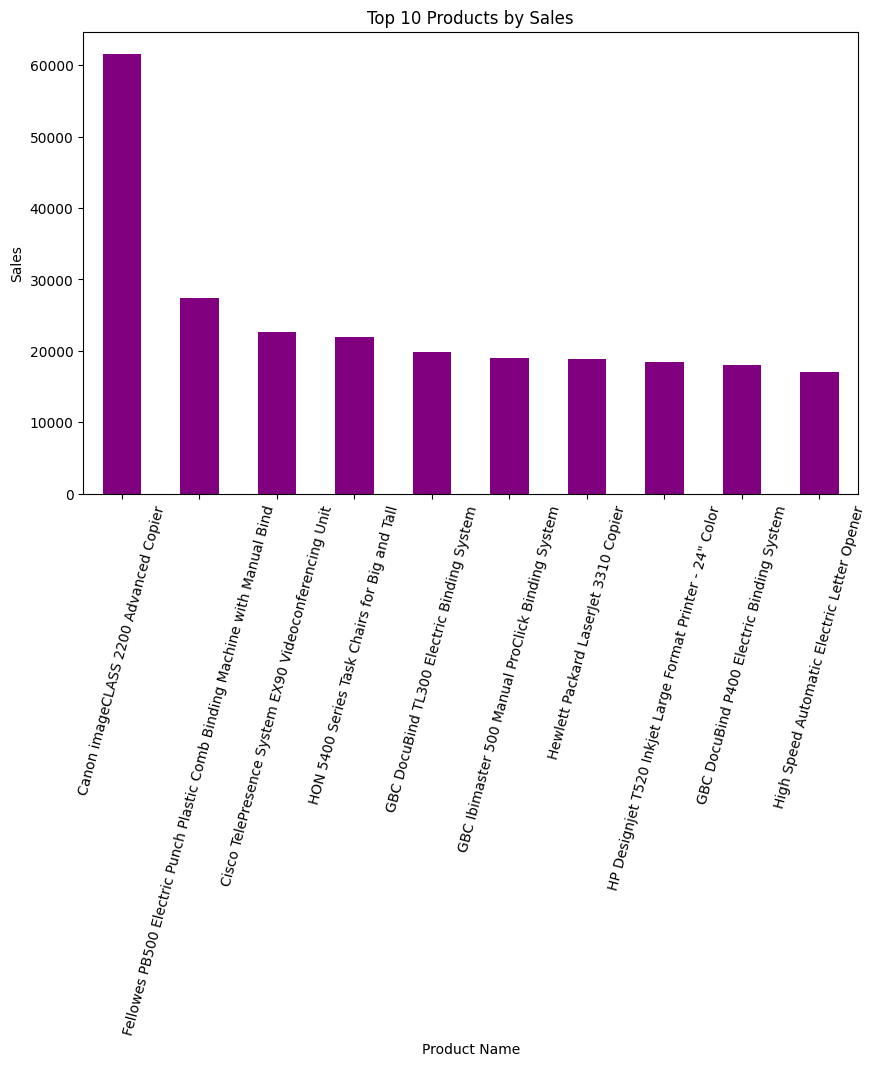

In [18]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()
